
   Monty Hall Problem      
***************************
(1) Play without switching
(2) Play with switching
(3) Exit
***************************

Enter choice... 1

How many attempts? 2000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


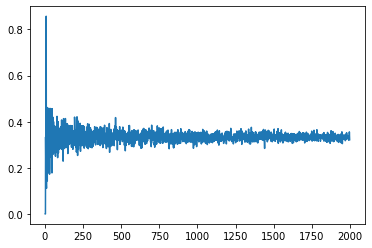


   Monty Hall Problem      
***************************
(1) Play without switching
(2) Play with switching
(3) Exit
***************************

Enter choice... 2

How many attempts? 2000


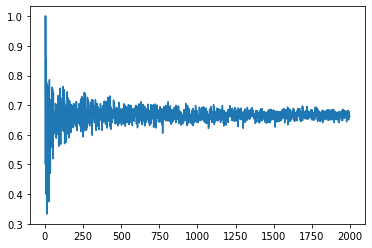


   Monty Hall Problem      
***************************
(1) Play without switching
(2) Play with switching
(3) Exit
***************************



KeyboardInterrupt: Interrupted by user

In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt


class Simulation:
    def __init__(self):
        attempts = -1
        while attempts < 1:
            attempts = GetIntegerInput("How many attempts? ")
        self.attempts = attempts
        self.meanScores = []
        self.count = []

    def Simulate(self):
        # Loop for the requested number of attempts
        for i in range(1, self.attempts):
            # initialise score array
            scores = []

            # Loop for number of outer loops we are on right now
            for _ in range(1, i):
                scores.append(self.TakeTurn())

            # append data for the results graph to display
            self.meanScores.append(np.mean(scores))
            self.count.append(i)

        # Display graph results
        self.DisplayResults()

    def TakeTurn(self):
        # select a correct answer and a guess
        actual = randint(0,2)
        guess = randint(0,2)

        # Win if guess is correct
        if actual == guess:
            return 1
        else:
            return 0

    def DisplayResults(self):
        # Plot the attempts on the x-axis and the mean score on the y-axis
        plt.plot(self.count, self.meanScores)
        plt.show()


def GetIntegerInput(message):
    while True:
        try:
            print("")
            choice = int(input(message))
        except ValueError:
            print("Please enter an integer")
            continue
        else:
            return choice

class SimulationWithSwitches(Simulation):
    def TakeTurn(self):
        # select a correct answer and a guess:
        actual = randint(0, 2)
        guess = randint(0, 2)

        # create all possible new guesses, removing our guess
        newGuesses = [0, 1, 2]
        newGuesses.remove(guess)

        # Reveal an option then remove it
        if newGuesses[0] == actual:
            del newGuesses[1]
        elif newGuesses[1] == actual:
            del newGuesses[0]
        else:
            del newGuesses[randint(0, len(newGuesses)) - 1]

        # Now switch our option to the remaining option
        guess = newGuesses[0]

        # Win if guess is correct
        if actual == guess:
            return 1
        else:
            return 0


def Menu():
    print("")
    print("   Monty Hall Problem      ")
    print("***************************")
    print("(1) Play without switching")
    print("(2) Play with switching")
    print("(3) Exit")
    print("***************************")

    # Define allowed menu input
    menuOptions = [1, 2, 3]

    # Take menu input choice
    choice = -1
    while(choice not in menuOptions):
        choice = GetIntegerInput("Enter choice... ")

    # Create the correct simulation (or exit)
    if choice == 1:
        simulation = Simulation()
    elif choice == 2:
        simulation = SimulationWithSwitches()
    elif choice == 3:
        exit()

    # Simulate the chosen scenario
    simulation.Simulate()

    # Return to the menu
    Menu()


if __name__ == "__main__":
    Menu()